# EDA - анализ французского рынка автомобилей

Проект подготовлен в качестве одного из заданий вступительных испытаний на Тинькофф Образование на курс Машинное обучение и Глубокое обучение. 

__Автор:__ Потапов Иван Сергвеевич :sunglasses: :facepunch: :smiley_cat:

__Дата окончания:__ _


Здесь мы будем исследовать данные по французскому рынку поддержанных автомобилей. 

Самы данные можно найти в источнике по [ссылке](https://www.kaggle.com/spicemix/french-second-hand-car).

In [985]:
import numpy as np
import pandas as pd
import warnings
import collections
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore", UserWarning)

Считываем данные и выводим первые строки.

In [986]:
data = pd.read_csv('dataset.csv')
data.head()

,publishedsince,carmodel,price,année,miseencirculation,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,...,conso.batterie,couleurintérieure,puissancemoteur,primeàlaconversion,garantieconstructeur,provenance,prixinclutlabatterie,voltagebatterie,intensitébatterie,prixinclutlabatterie.1
0,2 jours,\n RENAULT TWINGO 3\n,\n 11 080 €\n,2020.0,17/07/2020,non requis,27 297 Km,Essence,mécanique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5 jours,\n BMW SERIE 4 F36 GRAN COUPE\n,\n 50 690 €\n,2019.0,27/04/2019,non requis,59 778 Km,Diesel,automatique,Saphirschwarz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19 jours,\n BMW SERIE 2 F45 ACTIVE TOURER\n,\n 19 740 €\n,2017.0,14/05/2017,requis,128 835 Km,Hybride essence électrique,automatique,gris metal,...,11 kWh/100km,cuir noir,165 kW,,NaN,NaN,NaN,NaN,NaN,NaN
3,8 jours,\n RENAULT TRAFIC 2 MINIBUS\n,\n 13 890 €\n,2007.0,11/05/2007,requis,225 334 Km,Diesel,mécanique,GRIS F,...,NaN,GRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 16 780 €\n,2020.0,20/01/2021,non requis,14 218 Km,Essence,mécanique,gris foncé,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN


Выведем основную информацию о датасете и сделаем некоторые выводы.

In [987]:
data.shape

(2441, 40)

In [988]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   publishedsince            2441 non-null   object 
 1   carmodel                  2441 non-null   object 
 2   price                     2441 non-null   object 
 3   année                     2440 non-null   float64
 4   miseencirculation         2440 non-null   object 
 5   contrôletechnique         2440 non-null   object 
 6   kilométragecompteur       2440 non-null   object 
 7   énergie                   2440 non-null   object 
 8   boîtedevitesse            2440 non-null   object 
 9   couleurextérieure         2440 non-null   object 
 10  nombredeportes            2436 non-null   float64
 11  nombredeplaces            2362 non-null   float64
 12  garantie                  2062 non-null   object 
 13  premièremain(déclaratif)  2440 non-null   object 
 14  nombrede

# Comments


# 1. Предобработка данных

In [989]:
data.drop(['vérifié&garanti', 'rechargeable', 'autonomiebatterie',
       'capacitébatterie', 'conso.batterie', 'couleurintérieure',
       'puissancemoteur', 'primeàlaconversion', 'garantieconstructeur',
       'provenance', 'prixinclutlabatterie', 'voltagebatterie',
       'intensitébatterie', 'prixinclutlabatterie.1', 'nombredepropriétaires', 'id'], axis = 1, inplace = True)

Датасет очень плохо адаптирован для работы, плюс он весь на французском языке. Для того, чтобы иметь возможность дальше с ним работать, переведем названия столбцов и приведем значения в строках в приятный вид.

In [990]:
columns = {'publishedsince': 'published since',
          'carmodel' : 'car model',
          'année' : 'year',
          'miseencirculation' : 'first registrarion date',
          'contrôletechnique': 'needs a technical check',
          'kilométragecompteur' : 'mileage meter',
          'énergie' : 'energy type',
          'boîtedevitesse' : 'speed box',
          'couleurextérieure' : 'colour',
          'nombredeportes' : 'number of doors',
          'nombredeplaces' : 'number of places',
          'premièremain(déclaratif)' : 'first hand',
          'puissancefiscale' : 'power classification',
          'puissancedin' : 'horsepower',
          "crit'air" : 'air pollution metric',
          'émissionsdeco2' : 'CO2 emission',
          'consommationmixte' : 'consumption' ,
          'normeeuro' : 'euro norm',
          'options' : 'options',
          'vendeur' : 'seller'
          }

data.rename(columns = columns, inplace=True)

Во всех строках переменной __price__  тип данных - текст, хорошо, что во многих из них достаточно удалить лишние символы и установить численный тип. Однако в паре десятков записей хранится сразу две цены: до и после вычета налога, и тут нужно узнать, какое из значений нам подходит. Немного посерфив в интернете, мы поняли, что интернет магазины устанавливают цену для покупателя, а налог платит продавец, следовательно, записи должны отображать стоимость автомобиля с прибавленным налогом (большее значение). Нужное нам число идет первым в строке, его и достаем.

In [991]:
s = []
for i in range(data.shape[0]):
    try:
        data['price'][i] = int(data['price'][i].replace('€', '').strip().replace(' ',''))
    except:
        s = data['price'][i]
        data['price'][i] = int(str(s[ : s.index('\xa0')]).replace(' ',''))


<ipython-input-991-847c6af8a45a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'][i] = int(data['price'][i].replace('€', '').strip().replace(' ',''))
<ipython-input-991-847c6af8a45a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'][i] = int(str(s[ : s.index('\xa0')]).replace(' ',''))


Признак __options__ обещает быть очень интересным, он содержит в себе набор опций, включенных в машину, если предположение о том, что каждая запись включает в себя слова из стандартизированного набора, окажется верной, мы сможем создать ряд новых бинарных признаков, содержащих информацию о том, включена ли данная опция в машину. Попробуем проверить наш план на реализуемость.

In [992]:
s = set()
for i in range(2441):
    l = list(map(lambda s: s.strip().replace("'", '').replace('[','').replace(']','').lower(), data['options'][i].split(",")))
    for item in l:
        s.add(item)
    data['options'][i] = l
len(s)

<ipython-input-992-5bb09fa72595>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['options'][i] = l


13072

Оченб грустно((

Набор не содержит в себе ключевые слова из заранее сформированного списка, о чем свидетельствует более 13 тысяч уникальных значений множества опций. К сожалению, мы не сможем работать со всеми пунктами сразу, но мы попробуем проанализировать распределение наиболее частых.

Признак __seller__ имеет всего одно уникальное значение - информативным не является. Тоже выкидываем.

In [993]:
data.drop(['seller'], axis = 1, inplace = True)

Остальные параметры без труда преобразуем, удаляя пробелы и другие лишние подстроки, меняя тип данных.

In [994]:
data['published since'] = data['published since'].apply(lambda s:  s.replace('jours', '').replace('jour', '')).astype(int) #Оставляем только количество дней в колонке' publishedsince'
data['car model'] = data['car model'].apply(lambda s:  s.replace('\n', ''))
data['year'] = data['year'].fillna(-1).astype(int)
data['colour'] = data['colour'].astype(str).apply(lambda s:  s.strip().lower())
data['first registrarion date'] = pd.to_datetime(data['first registrarion date'])
data['needs a technical check'] = data['needs a technical check'].replace({' non requis':0, ' requis': 1, None : -1}).astype(str)
data['mileage meter'] = data['mileage meter'].fillna(-1).astype(str).apply(lambda s: s.replace('Km', '')).apply(lambda s: s.replace(' ', '')).astype(int)
data['energy type'] = data['energy type'].fillna('-1').apply(lambda s: s.replace(' ', ''))
data['speed box'] = data['speed box'].replace({None : '-1', ' ' : '-1'}).apply(lambda s: s.replace(' ', '')) 
data['garantie'] = data['garantie'].fillna('-1').apply(lambda s: s.replace(' ', '')).apply(lambda s: s.replace('mois', '')).astype(int)
data['first hand'] = data['first hand'].replace({None : '-1', ' oui' : 1, ' non' : 0}).astype(int)
data['power classification'] = data['power classification'].replace({None : '-1'}).apply(lambda s: s.replace(' CV', '')).astype(int)
data['horsepower'] = data['horsepower'].fillna('-1').apply(lambda s: s.replace(' ch', '')).astype(int)
data['consumption'] = data['consumption'].fillna('-1').apply(lambda s: s.replace(' l/100km', '').strip()).astype(float)
data['euro norm'] = data['euro norm'].fillna('-1').apply(lambda s: s.strip())
data['number of doors'] = data['number of doors'].fillna(-1)
data['number of places'] = data['number of places'].fillna(-1)
data['CO2 emission'] = data['CO2 emission'].fillna('-1').apply(lambda s: s.replace(' g/kmB', '')).apply(lambda s: s.replace(' g/kmD', '')).apply(lambda s: s.replace(' g/kmG', '')).apply(lambda s: s.replace(' g/kmA', '')).apply(lambda s: s.replace(' g/kmE', '')).apply(lambda s: s.replace(' g/kmC', '')).apply(lambda s: s.replace(' g/kmF', '')).astype(int)
data['air pollution metric'] = data['air pollution metric'].fillna(-1).astype(str)

Параметр __waranty__ очень легко избавить от лишних слов и оставить только число, но одним из уникальных значений является _'Garantie constructeur'_, такой вид гарантии в среднем имеет срок дейсвтия 3 года, но может быть сорван раньше срока, если наступят условия одного из условий. Нам ничего не остается, как заполнить эту ячейку так же как и пропуск, которые мы будем обрабатывать позднее.

In [995]:
data['waranty'] = data['waranty'].fillna('-1').replace('Garantie constructeur', '-1').apply(lambda s: s.replace('Garantie','').replace('mois','').strip()).astype(int)

In [996]:
data.head()

,published since,car model,price,year,first registrarion date,needs a technical check,mileage meter,energy type,speed box,colour,...,first hand,power classification,horsepower,air pollution metric,CO2 emission,consumption,euro norm,options,departement,waranty
0,2,RENAULT TWINGO 3,11080,2020,2020-07-17,0,27297,Essence,mécanique,gris,...,1,5,90,1.0,111,4.9,EURO6,"[airbags frontaux, esp, afu, fixations isofix,...",35,12
1,5,BMW SERIE 4 F36 GRAN COUPE,50690,2019,2019-04-27,0,59778,Diesel,automatique,saphirschwarz,...,0,15,258,2.0,149,5.9,EURO6,"[pneus roulage à plat, affichage tête haute, p...",31,24
2,19,BMW SERIE 2 F45 ACTIVE TOURER,19740,2017,2017-05-14,1,128835,Hybrideessenceélectrique,automatique,gris metal,...,0,5,136,1.0,49,2.0,EURO6,"[airbags latéraux, ""assistance au freinage dur...",94,6
3,8,RENAULT TRAFIC 2 MINIBUS,13890,2007,2007-11-05,1,225334,Diesel,mécanique,gris f,...,0,9,135,3.0,197,7.4,EURO4,"[abs, peinture métallisée, système audio cd, 6...",28,6
4,60,CITROEN C3 (3E GENERATION),16780,2020,2021-01-20,0,14218,Essence,mécanique,gris foncé,...,0,5,110,1.0,104,4.7,EURO6,"[airbags rideaux, esp, détection panneaux sign...",61,12


In [997]:
data = data.replace(-1, np.nan).replace('-1', np.nan)

Меняем все значения _'-1'_ меняем на _Nan_, так как раньше мы все пропуски записали как _'-1'_.

Теперь мы имеем датасет, с которым можно работать аналитически.

# 2. Обработка пропусков

Для обработки пропусков и удобной дальнейшей работы разобьем все факторы на категориальные, числовые и строковые.

In [998]:
cat_params = ['energy type', 'speed box', 'air pollution metric',
              'departement', 'needs a technical check',  'first hand',
             'euro norm', 'number of doors', 'number of places']
num_params = ['published since', 'price', 'year', 'mileage meter', 'garantie',
             'horsepower', 'CO2 emission', 'waranty','consumption', 'power classification']
string_params = ['car model', 'colour']
other_params = ['date', 'options']

Пропуски во всех категориальных факторов мы заменим на моду. Пропуски числовых фичей заполним медианой.  

In [999]:
data[num_params].fillna(data[num_params].mean(), inplace = True)
for i in data[cat_params].mode():
    data[i] = data[i].fillna(data[cat_params].mode()[i][0])

/Users/vaneque/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [1000]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   published since          2441 non-null   int64         
 1   car model                2441 non-null   object        
 2   price                    2441 non-null   int64         
 3   year                     2440 non-null   float64       
 4   first registrarion date  2440 non-null   datetime64[ns]
 5   needs a technical check  2441 non-null   object        
 6   mileage meter            2440 non-null   float64       
 7   energy type              2441 non-null   object        
 8   speed box                2441 non-null   object        
 9   colour                   2441 non-null   object        
 10  number of doors          2441 non-null   float64       
 11  number of places         2441 non-null   float64       
 12  garantie                 2062 non-

Единсветнный пропуск по дате мы просто удалим.

In [1001]:
data.dropna(inplace = True)

In [1002]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1801 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   published since          1801 non-null   int64         
 1   car model                1801 non-null   object        
 2   price                    1801 non-null   int64         
 3   year                     1801 non-null   float64       
 4   first registrarion date  1801 non-null   datetime64[ns]
 5   needs a technical check  1801 non-null   object        
 6   mileage meter            1801 non-null   float64       
 7   energy type              1801 non-null   object        
 8   speed box                1801 non-null   object        
 9   colour                   1801 non-null   object        
 10  number of doors          1801 non-null   float64       
 11  number of places         1801 non-null   float64       
 12  garantie                 1801 non-

# 3. Формирование новых признаков.

Из параметра _'car model'_ мы можем получить новый - марка автомобиля, так и поступим.

In [1003]:
data['mark'] = data['car model'].apply(lambda s: s.strip().split()[0])
cat_params.append('mark')
data['mark']


0       RENAULT
1           BMW
2           BMW
3       RENAULT
4       CITROEN
         ...   
2436     TOYOTA
2437    PORSCHE
2438    CITROEN
2439       AUDI
2440       SEAT
Name: mark, Length: 1801, dtype: object

# 4. Анализ факторов

## Таблица факторов

Информация взята из источника и самостоятельного анализа.

| № п.п. | Параметр | Описание | Тип данных | 
| -:- | --- | --- | --- | 
| 0 | published since   | date of first publication of the advertisement | number | 
| 1 | car model   |  contains the make and model name of the car | string | 
| 2 | price   |  price of the car | number |
| 3 | year   |  year of first registration | number |
| 4 | first registrarion date   |  date of first registration | date |
| 5 | needs a technical check   |  the car requires a technical check | binary (categorial) |
| 6 | mileage meter   | Number of km the car has on the odometer  | number |
| 7 | energy type   |  Car energy | categorial |
| 8 | speed box   | Gearbox type  | categorial |
| 9 | number of doors   |  Car's number of door | number |
| 10 | number of places   |  Car's number of seats | number |
| 11 | garantie   |  How long the car is guaranted | number |
| 12 | first hand    |  Is the car first hand | binary (categorial)|
| 13 | power classification   |  french metric of car power | categorial |
| 14 | horsepower   |  car power | number |
| 15 | air pollution metric   |  french metric to assess assess pollution 1 good, 4 bad | categorial |
| 16 | CO2 emission   |  CO2 emission | number |
| 17 | consumption  |  Energy consumption per 100km | categorial |
| 18 | euro norm   |  euro norm | categoral |
| 19 | options   | An array of options availaible with the car | list |
| 20 | departement  | french district | categorial |
| 21 | waranty  |  warranty in months | number |
| 22 | colour  |  Outside car color | string |
| 23 | options  | An array of options availaible with the car | list |
| 24 | mark  | car producer company  | string |

Разобьем все факторы на подгруппы по типу данных. Пропуски в каждой группе будем заполнять по-разному: категориальные признаки - модой, числовые - медианой, по другим параметрам просто удалим строки.

In [1004]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1801 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   published since          1801 non-null   int64         
 1   car model                1801 non-null   object        
 2   price                    1801 non-null   int64         
 3   year                     1801 non-null   float64       
 4   first registrarion date  1801 non-null   datetime64[ns]
 5   needs a technical check  1801 non-null   object        
 6   mileage meter            1801 non-null   float64       
 7   energy type              1801 non-null   object        
 8   speed box                1801 non-null   object        
 9   colour                   1801 non-null   object        
 10  number of doors          1801 non-null   float64       
 11  number of places         1801 non-null   float64       
 12  garantie                 1801 non-

Для каждого фактора построим гистограмму распределения и попробуем сделать какие-то выводы.

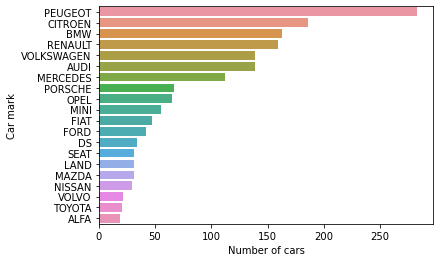

In [1005]:
sns.barplot(y='index', x='mark', data=data['mark'].str.strip().value_counts().reset_index().head(20), orient = 'h');
plt.xlabel('Number of cars')
plt.ylabel('Car mark');

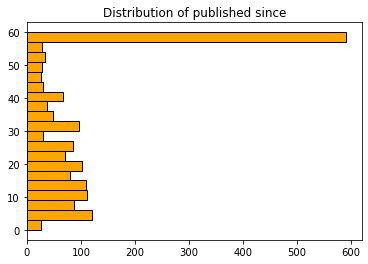

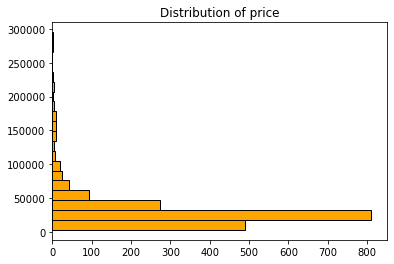

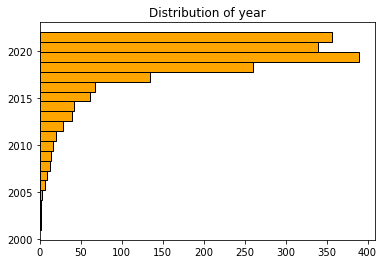

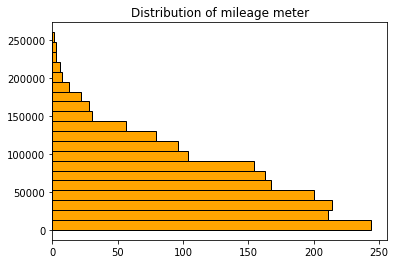

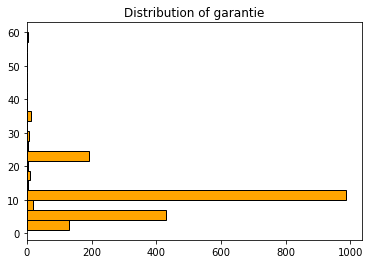

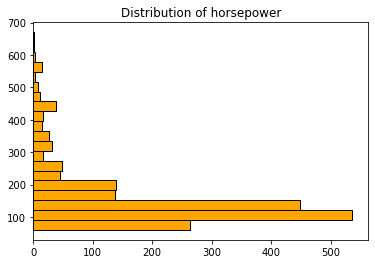

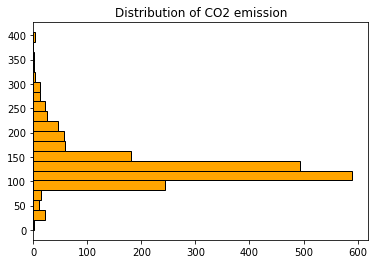

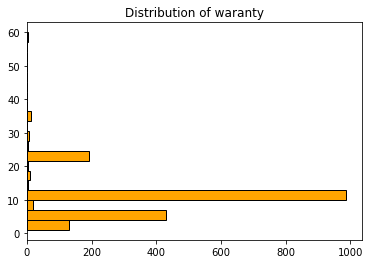

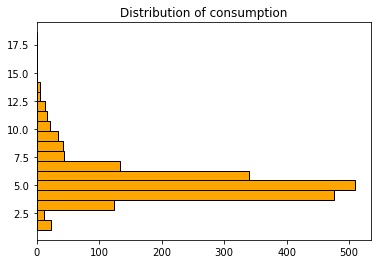

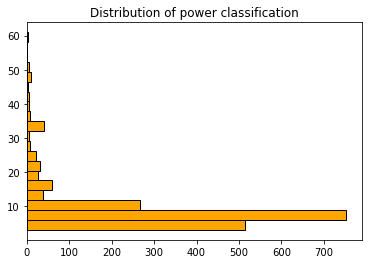

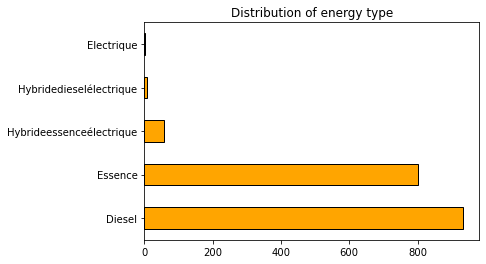

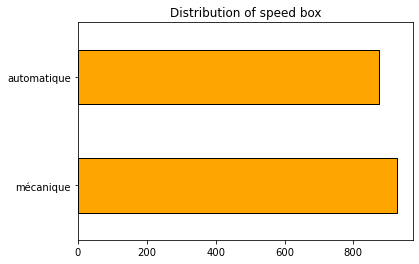

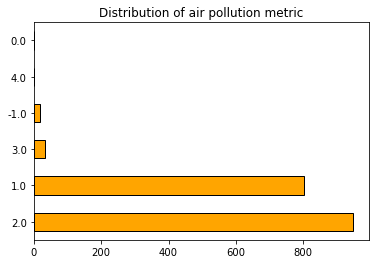

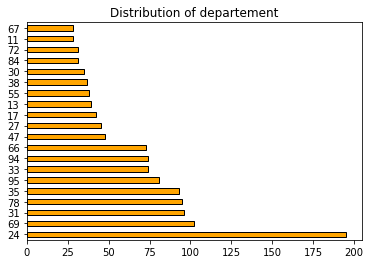

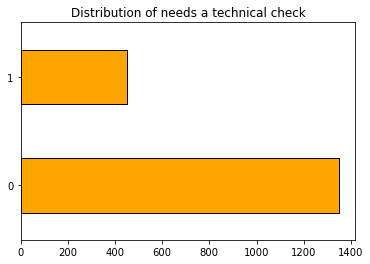

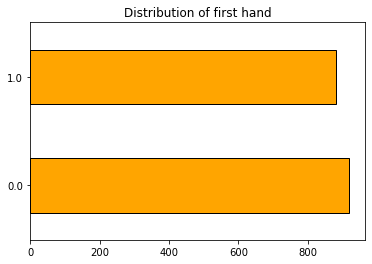

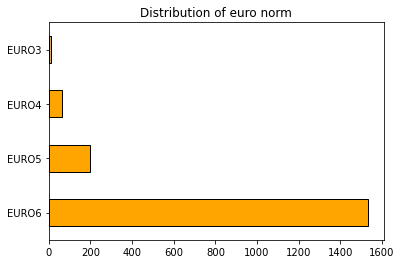

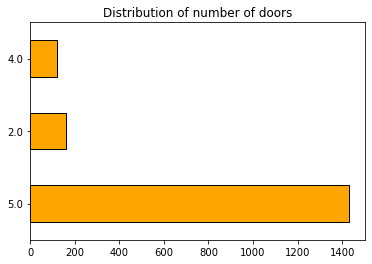

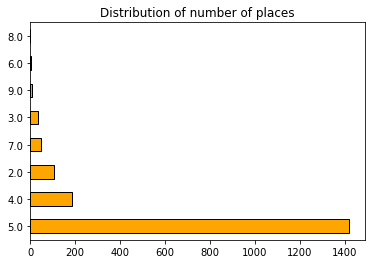

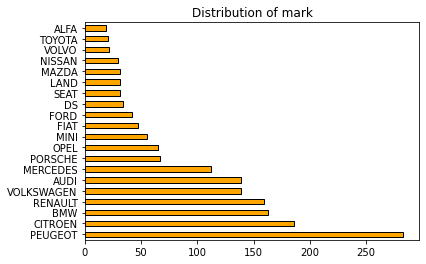

In [1006]:
for col in num_params:
    plt.hist(data[col], color='orange', ec='black', orientation = 'horizontal', bins = 20)
    plt.title(f'Distribution of {col}')
    plt.show()
    
for col in cat_params:
    data[col].value_counts()[:min(data[col].value_counts().shape[0], 20)].plot.barh(color='orange', ec='black' , orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

1. Влияние факторов на цену
2. Тренды
3. Различие цен в разных регионах

In [1007]:
options = []
for opt in data['options']:
    options += opt
s = collections.Counter(options)

sorted(s.items(), key = lambda s : s[1], reverse = True)[50]

('vitres ar. surteintées', 390)

In [1008]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1801 entries, 0 to 2440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   published since          1801 non-null   int64         
 1   car model                1801 non-null   object        
 2   price                    1801 non-null   int64         
 3   year                     1801 non-null   float64       
 4   first registrarion date  1801 non-null   datetime64[ns]
 5   needs a technical check  1801 non-null   object        
 6   mileage meter            1801 non-null   float64       
 7   energy type              1801 non-null   object        
 8   speed box                1801 non-null   object        
 9   colour                   1801 non-null   object        
 10  number of doors          1801 non-null   float64       
 11  number of places         1801 non-null   float64       
 12  garantie                 1801 non-